In [1]:
from google.colab import drive
drive.mount('/content/drive')
import zipfile
import os
zip_path = '/content/drive/MyDrive/Dataset/bank-additional.zip'
extract_to = '/content/bank-additional'
os.makedirs(extract_to, exist_ok=True)
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"Files extracted to: {extract_to}")
import pandas as pd

file_path = os.path.join(extract_to, "bank-additional", "bank-additional-full.csv")
df = pd.read_csv(file_path, sep=';')

print(f"\nDataset Loaded Successfully with {df.shape[0]} rows and {df.shape[1]} columns:\n")
print(df.head())

Mounted at /content/drive
Files extracted to: /content/bank-additional

Dataset Loaded Successfully with 41188 rows and 21 columns:

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   m

In [2]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score,precision_score, recall_score, f1_score, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Input


from sklearn.svm import SVC  # Support Vector Machine for classification
from sklearn.naive_bayes import GaussianNB  # Naive Bayes classifier
from sklearn.linear_model import LinearRegression  # Simple regression model
from sklearn.ensemble import RandomForestRegressor  # Regression version of Random Forest
from sklearn.svm import SVR  # Support Vector Regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # Regression metrics
from sklearn.neighbors import KNeighborsClassifier




In [3]:


# Convert target variable to binary (yes=1, no=0)
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Identify categorical columns
cat_cols = df.select_dtypes(include=['object']).columns

# Apply One-Hot Encoding
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)  # drop_first=True avoids multicollinearity

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())





Missing Values:
 age                              0
duration                         0
campaign                         0
pdays                            0
previous                         0
emp.var.rate                     0
cons.price.idx                   0
cons.conf.idx                    0
euribor3m                        0
nr.employed                      0
y                                0
job_blue-collar                  0
job_entrepreneur                 0
job_housemaid                    0
job_management                   0
job_retired                      0
job_self-employed                0
job_services                     0
job_student                      0
job_technician                   0
job_unemployed                   0
job_unknown                      0
marital_married                  0
marital_single                   0
marital_unknown                  0
education_basic.6y               0
education_basic.9y               0
education_high.school            0
ed

In [4]:
print(df.head())

   age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56       261         1    999         0           1.1          93.994   
1   57       149         1    999         0           1.1          93.994   
2   37       226         1    999         0           1.1          93.994   
3   40       151         1    999         0           1.1          93.994   
4   56       307         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  ...  month_may  month_nov  \
0          -36.4      4.857       5191.0  ...       True      False   
1          -36.4      4.857       5191.0  ...       True      False   
2          -36.4      4.857       5191.0  ...       True      False   
3          -36.4      4.857       5191.0  ...       True      False   
4          -36.4      4.857       5191.0  ...       True      False   

   month_oct  month_sep  day_of_week_mon  day_of_week_thu  day_of_week_tue  \
0      False      False         

In [5]:
model_results = {}

# Define features and target
X = df.drop(columns=["y"])
y = df["y"]

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [6]:
# Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Function to train models and measure time
def train_model(model, model_name):
    start_time = time.time()
    model.fit(X_train_scaled, y_train)  # Train the model
    end_time = time.time()
    train_time = end_time - start_time  # Measure training time

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)

    # Additional metrics using sklearn functions
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print results
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"AUC Score: {auc_score:.4f}")
    print(f"Training Time: {train_time:.2f} seconds")
    print(f"Recall: {recall:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"F1-Score: {f1:.3f}")

    model_results[model_name] = {
        "Accuracy": accuracy,
        "AUC Score": auc_score,
        "Training Time (s)": train_time,
        "Recall": recall,
        "Precision": precision,
        "F1-Score": f1
    }

In [9]:
print("\n🔹 Training K-Nearest Neighbors (KNN)...")
knn_model = KNeighborsClassifier(n_neighbors=100)
train_model(knn_model, "K-Nearest Neighbors")



🔹 Training K-Nearest Neighbors (KNN)...

K-Nearest Neighbors Performance:
Accuracy: 0.8489
AUC Score: 0.8487
Training Time: 0.05 seconds
Recall: 0.766
Precision: 0.917
F1-Score: 0.835


In [11]:
# 🔹 Logistic Regression
print("\n🔹 Training Logistic Regression...")
lr_model = LogisticRegression(max_iter=500)
train_model(lr_model, "Logistic Regression")


🔹 Training Logistic Regression...

Logistic Regression Performance:
Accuracy: 0.9313
AUC Score: 0.9313
Training Time: 0.54 seconds
Recall: 0.920
Precision: 0.941
F1-Score: 0.930


In [12]:
# 🔹 Naïve Bayes
print("\n🔹 Training Naïve Bayes...")
nb_model = GaussianNB()
train_model(nb_model, "Naïve Bayes")



🔹 Training Naïve Bayes...

Naïve Bayes Performance:
Accuracy: 0.8121
AUC Score: 0.8123
Training Time: 0.06 seconds
Recall: 0.874
Precision: 0.777
F1-Score: 0.823


In [13]:
# 🔹 Random Forest
print("\n🔹 Training Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
train_model(rf_model, "Random Forest")


🔹 Training Random Forest...

Random Forest Performance:
Accuracy: 0.9547
AUC Score: 0.9547
Training Time: 6.18 seconds
Recall: 0.964
Precision: 0.946
F1-Score: 0.955


In [14]:
# 🔹 XGBoost
print("\n🔹 Training XGBoost...")
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
train_model(xgb_model, "XGBoost")


🔹 Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:59:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Performance:
Accuracy: 0.9512
AUC Score: 0.9512
Training Time: 0.81 seconds
Recall: 0.950
Precision: 0.952
F1-Score: 0.951


In [15]:
# 🔹 Neural Network
print("\n🔹 Training Neural Network...")
nn_model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])


🔹 Training Neural Network...


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1828/1828 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8981 - loss: 0.2430
Epoch 2/10
1828/1828 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9393 - loss: 0.1324
Epoch 3/10
1828/1828 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9456 - loss: 0.1185
Epoch 4/10
1828/1828 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9467 - loss: 0.1131
Epoch 5/10
1828/1828 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9490 - loss: 0.1115
Epoch 6/10
1828/1828 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9511 - loss: 0.1076
Epoch 7/10
1828/1828 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9517 - loss: 0.1052
Epoch 8/10
1828/1828 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9533 - loss: 0.1019
Epoch 9/10
1828/1828 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9571 - loss: 0.0958
Epoch 10/10
1828/1828 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9572 - loss: 0.0954
457/457 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step
457/457 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step


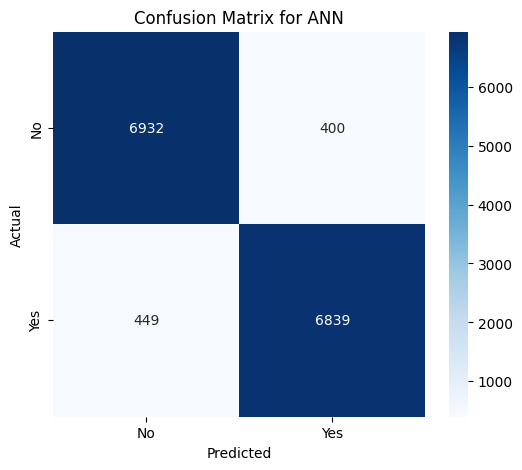

ANN Accuracy: 0.9419
Precision: 0.9447
Recall: 0.9384
F1-Score: 0.9416


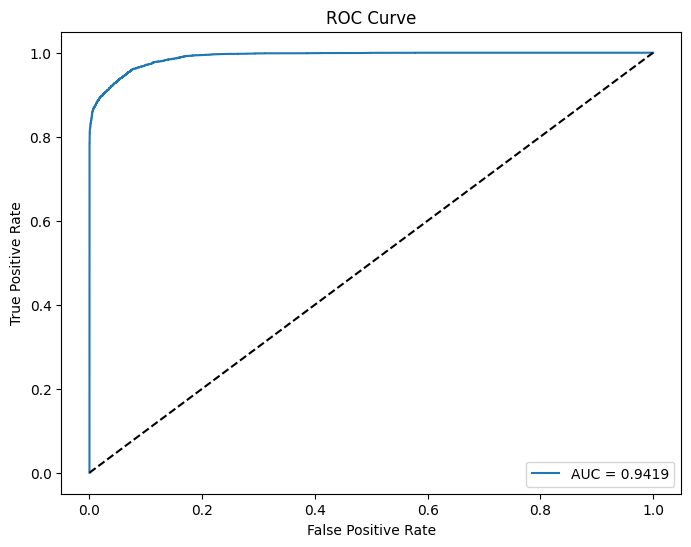

457/457 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      7332
           1       0.94      0.94      0.94      7288

    accuracy                           0.94     14620
   macro avg       0.94      0.94      0.94     14620
weighted avg       0.94      0.94      0.94     14620



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │           3,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,709 (65.27 KB)

 Trainable params: 5,569 (21.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,140 (43.52 KB)

In [16]:
# Import necessary libraries for ANN
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Initialize a Sequential model
ann_model = Sequential()

# Add layers to the model
ann_model.add(Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]))  # Input layer and first hidden layer
ann_model.add(Dense(units=32, activation='relu'))  # Second hidden layer
ann_model.add(Dense(units=1, activation='sigmoid'))  # Output layer (sigmoid for binary classification)

# Compile the model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model to the training data
ann_model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=1)

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize model and train (code omitted)

# Make predictions
y_pred_ann = (ann_model.predict(X_test_scaled) > 0.5).astype("int32")
y_pred_proba_ann = ann_model.predict(X_test_scaled)



# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_ann)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Confusion Matrix for ANN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


precision_ann = precision_score(y_test, y_pred_ann)
recall_ann = recall_score(y_test, y_pred_ann)
f1_ann = f1_score(y_test, y_pred_ann)
# Evaluate Accuracy
accuracy_ann = accuracy_score(y_test, y_pred_ann)


print(f"ANN Accuracy: {accuracy_ann:.4f}")
print(f"Precision: {precision_ann:.4f}")
print(f"Recall: {recall_ann:.4f}")
print(f"F1-Score: {f1_ann:.4f}")

# ROC Curve and AUC Score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_ann)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_pred_ann):.4f}")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random chance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


y_pred_proba_ann = ann_model.predict(X_test_scaled)


print(classification_report(y_test, y_pred_ann))

# Print model summary
ann_model.summary()



In [17]:
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train Neural Network with a progress bar
start_time = time.time()
history = nn_model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=1)
end_time = time.time()
train_time_nn = end_time - start_time

# Evaluate Neural Network
nn_loss, nn_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=0)
y_pred_nn = (nn_model.predict(X_test_scaled) > 0.5).astype("int32")
auc_score_nn = roc_auc_score(y_test, y_pred_nn)

# Calculate additional metrics
precision_nn = precision_score(y_test, y_pred_nn)
recall_nn = recall_score(y_test, y_pred_nn)
f1_nn = f1_score(y_test, y_pred_nn)

# Store Neural Network results
model_results["Neural Network"] = {
    "Accuracy": nn_accuracy,
    "AUC Score": auc_score_nn,
    "Training Time (s)": train_time_nn,
    "Precision": precision_nn,
    "Recall": recall_nn,
    "F1-Score": f1_nn
}


print(f"\nNeural Network Performance:")
print(f"Accuracy: {nn_accuracy:.4f}")
print(f"AUC Score: {auc_score_nn:.4f}")
print(f"Training Time: {train_time_nn:.2f} seconds")
print(f"Precision: {precision_nn:.4f}")
print(f"Recall: {recall_nn:.4f}")
print(f"F1-Score: {f1_nn:.4f}")


print(classification_report(y_test, y_pred_nn))  # Use the correct prediction variable

# Print model summary
nn_model.summary()


Epoch 1/20
1828/1828 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8910 - loss: 0.2552 - val_accuracy: 0.9374 - val_loss: 0.1357
Epoch 2/20
1828/1828 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9367 - loss: 0.1432 - val_accuracy: 0.9386 - val_loss: 0.1281
Epoch 3/20
1828/1828 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9405 - loss: 0.1296 - val_accuracy: 0.9404 - val_loss: 0.1231
Epoch 4/20
1828/1828 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9412 - loss: 0.1294 - val_accuracy: 0.9423 - val_loss: 0.1224
Epoch 5/20
1828/1828 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9439 - loss: 0.1212 - val_accuracy: 0.9437 - val_loss: 0.1193
Epoch 6/20
1828/1828 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9461 - loss: 0.1171 - val_accuracy: 0.9440 - val_loss: 0.1176
Epoch 7/20
1828/1828 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9432 - loss: 0.1192 - val_accuracy: 0.9449 - val_loss: 0.1182
Epoch 8/20
1828/1828 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9452 - loss: 0.1158 - 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           6,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,701 (178.52 KB)

 Trainable params: 15,233 (59.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,468 (119.02 KB)

In [18]:
# 🔹 Comparison of Models

df_results = pd.DataFrame(model_results).T
print("\nModel Performance Summary:")
print(df_results)





Model Performance Summary:
                     Accuracy  AUC Score  Training Time (s)    Recall  \
K-Nearest Neighbors  0.848906   0.848656           0.046621  0.765779   
Logistic Regression  0.931327   0.931293           0.543682  0.920143   
Naïve Bayes          0.812107   0.812292           0.056292  0.873902   
Random Forest        0.954651   0.954678           6.178844  0.963502   
XGBoost              0.951163   0.951159           0.812333  0.950055   
Neural Network       0.944254   0.944213          79.760784  0.930571   

                     Precision  F1-Score  
K-Nearest Neighbors   0.917475  0.834792  
Logistic Regression   0.940797  0.930355  
Naïve Bayes           0.776992  0.822603  
Random Forest         0.946489  0.954919  
XGBoost               0.951883  0.950968  
Neural Network        0.956424  0.943320  


<ipython-input-19-9f8b91179e5f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_results.index, y=df_results['Accuracy'], palette="viridis")
<ipython-input-19-9f8b91179e5f>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_results.index, y=df_results['AUC Score'], palette="magma")


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'K-Nearest Neighbors'),
  Text(1, 0, 'Logistic Regression'),
  Text(2, 0, 'Naïve Bayes'),
  Text(3, 0, 'Random Forest'),
  Text(4, 0, 'XGBoost'),
  Text(5, 0, 'Neural Network')])

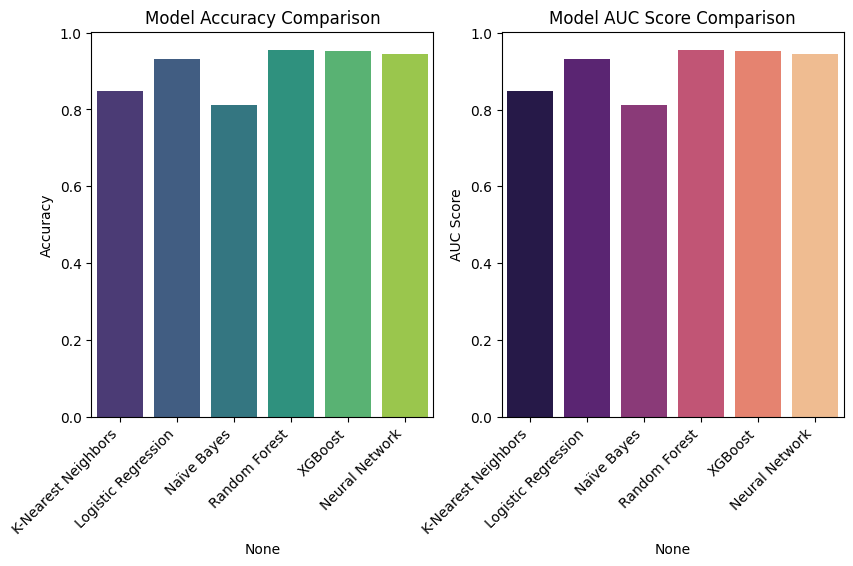

In [19]:
plt.figure(figsize=(15, 5))

# Plot Accuracy
plt.subplot(1, 3, 1)
sns.barplot(x=df_results.index, y=df_results['Accuracy'], palette="viridis")
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')

# Plot AUC Score
plt.subplot(1, 3, 2)
sns.barplot(x=df_results.index, y=df_results['AUC Score'], palette="magma")
plt.title('Model AUC Score Comparison')
plt.ylabel('AUC Score')
plt.xticks(rotation=45, ha='right')


<ipython-input-20-d594feec3b7a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_results.index, y=df_results["Training Time (s)"], palette="rocket")


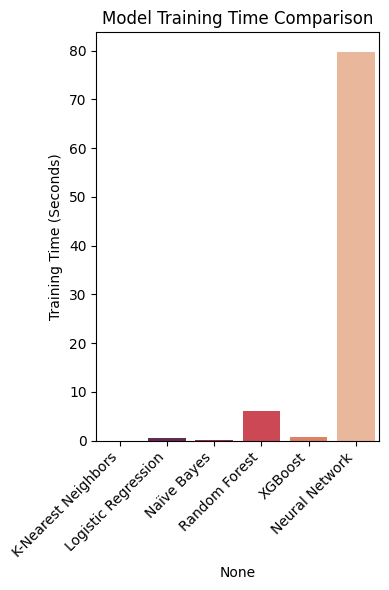

In [20]:
plt.figure(figsize=(10, 6))

# Plot Training Time
plt.subplot(1, 3, 1)
sns.barplot(x=df_results.index, y=df_results["Training Time (s)"], palette="rocket")
plt.title("Model Training Time Comparison")
plt.ylabel("Training Time (Seconds)")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [38]:
# Reassign the best model based on highest accuracy
best_model_name = df_results["Accuracy"].idxmax()

# Dictionary of models
model_dict = {
    "Logistic Regression": lr_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model,
    "Neural Network": nn_model,
    "K-Nearest Neighbors": knn_model,
    "Naïve Bayes" : nb_model
}

# Select the best model
best_model = model_dict.get(best_model_name, None)


if best_model:
    print(f"Best Model Selected: {best_model_name}")
else:
    print("Best model selection failed! Check if the model exists in the dictionary.")

Best Model Selected: Random Forest


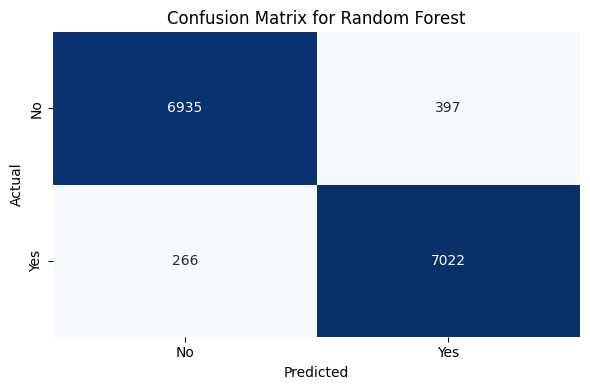

Accuracy: 0.9547 | Precision: 0.9465 | Recall: 0.9635 | F1-Score: 0.9549

--- Prediction Results ---
Correct Predictions: 13957
Incorrect Predictions: 663
  False Positives: 397
  False Negatives: 266
  True Positives: 7022
  True Negatives: 6935


In [22]:
# Get predictions from the best model
if best_model_name == "Neural Network":
    y_pred_best = (nn_model.predict(X_test_scaled) > 0.5).astype("int32").flatten()
else:
    y_pred_best = best_model.predict(X_test_scaled)


# Get confusion matrix values
conf_matrix = confusion_matrix(y_test, y_pred_best)

# Calculate metrics for the confusion matrix
TP = conf_matrix[1, 1]  # True Positive
TN = conf_matrix[0, 0]  # True Negative
FP = conf_matrix[0, 1]  # False Positive
FN = conf_matrix[1, 0]  # False Negative

# Calculate additional metrics
accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)

# Calculate percentage for each cell in the confusion matrix
total = conf_matrix.sum()
conf_matrix_percent = conf_matrix / total * 100


# Plot confusion matrix with both raw counts and percentages
fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"], cbar=False)


plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix for {best_model_name}")


plt.tight_layout()

plt.show()


print(f"Accuracy: {accuracy:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f} | F1-Score: {f1:.4f}")

# Print counts for correct and incorrect predictions
print("\n--- Prediction Results ---")
print(f"Correct Predictions: {TP + TN}")
print(f"Incorrect Predictions: {FP + FN}")
print(f"  False Positives: {FP}")
print(f"  False Negatives: {FN}")
print(f"  True Positives: {TP}")
print(f"  True Negatives: {TN}")

In [23]:



# 🔹 Store metrics for each category
category_metrics = {}

one_hot_columns = [col for col in X_test.columns if 'your_one_hot_condition' in col]

# 🔹 Loop through each one-hot column and calculate Precision, Recall, and F1-Score
for category in one_hot_columns:
    category_data = results_df.copy()
    category_data['Category'] = X_test[category]  # Assign the one-hot category to the results
    category_data = category_data[category_data['Category'] == 1]  # Filter rows where category is 1

    if category_data.shape[0] > 0:  # Ensure category has samples
        precision = precision_score(category_data['Actual'], category_data['Predicted'], zero_division=0)
        recall = recall_score(category_data['Actual'], category_data['Predicted'], zero_division=0)
        f1 = f1_score(category_data['Actual'], category_data['Predicted'], zero_division=0)

        category_metrics[category] = {'Precision': precision, 'Recall': recall, 'F1 Score': f1}

# Print out the metrics
for category, metrics in category_metrics.items():
    print(f"Category: {category}")
    print(f"  Precision: {metrics['Precision']:.2f}")
    print(f"  Recall: {metrics['Recall']:.2f}")
    print(f"  F1 Score: {metrics['F1 Score']:.2f}\n")


<ipython-input-25-1dc516316917>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.array(filtered_importances)[sorted_idx],


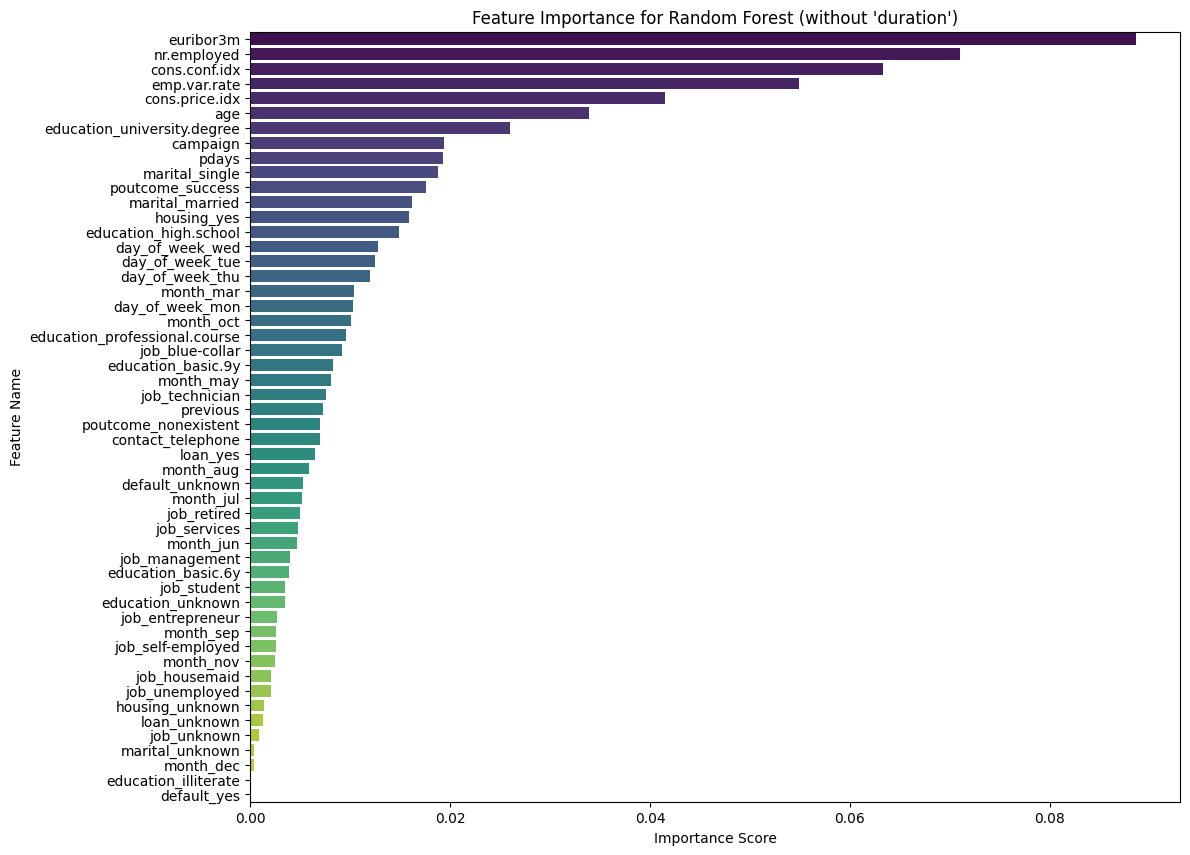

Feature                                  Importance
--------------------------------------------------
euribor3m                                0.088606  
nr.employed                              0.070970  
cons.conf.idx                            0.063309  
emp.var.rate                             0.054883  
cons.price.idx                           0.041543  
age                                      0.033873  
education_university.degree              0.025950  
campaign                                 0.019371  
pdays                                    0.019321  
marital_single                           0.018805  
poutcome_success                         0.017565  
marital_married                          0.016146  
housing_yes                              0.015871  
education_high.school                    0.014927  
day_of_week_wed                          0.012827  
day_of_week_tue                          0.012474  
day_of_week_thu                          0.011991  
month_mar    

In [25]:

if best_model_name in ["Random Forest", "XGBoost"]:
    importances = best_model.feature_importances_
    feature_names = X.columns

    # Remove 'duration' feature from the feature importance analysis
    filtered_importances = [importance for feature, importance in zip(feature_names, importances) if feature != 'duration']
    filtered_feature_names = [feature for feature in feature_names if feature != 'duration']

    # Sort the filtered importances in descending order
    sorted_idx = np.argsort(filtered_importances)[::-1]

    # Plot Feature Importance without 'duration'
    plt.figure(figsize=(12, 10))
    sns.barplot(x=np.array(filtered_importances)[sorted_idx],
                y=np.array(filtered_feature_names)[sorted_idx],
                palette="viridis")
    plt.xlabel("Importance Score")
    plt.ylabel("Feature Name")
    plt.title(f"Feature Importance for {best_model_name} (without 'duration')")
    plt.show()



    print(f"{'Feature':<40} {'Importance':<10}")
    print("-" * 50)
    for idx in sorted_idx:
        print(f"{filtered_feature_names[idx]:<40} {filtered_importances[idx]:<10.6f}")


else:
    print(f"Feature importance is not available for {best_model_name}.")

<ipython-input-26-d42f8b48c638>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  euribor_acceptance = df_analysis.groupby('euribor3m_bin')['y'].agg(['mean', 'count']).reset_index()
<ipython-input-26-d42f8b48c638>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  nr_employed_acceptance = df_analysis.groupby('nr_employed_bin')['y'].agg(['mean', 'count']).reset_index()
<ipython-input-26-d42f8b48c638>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default 

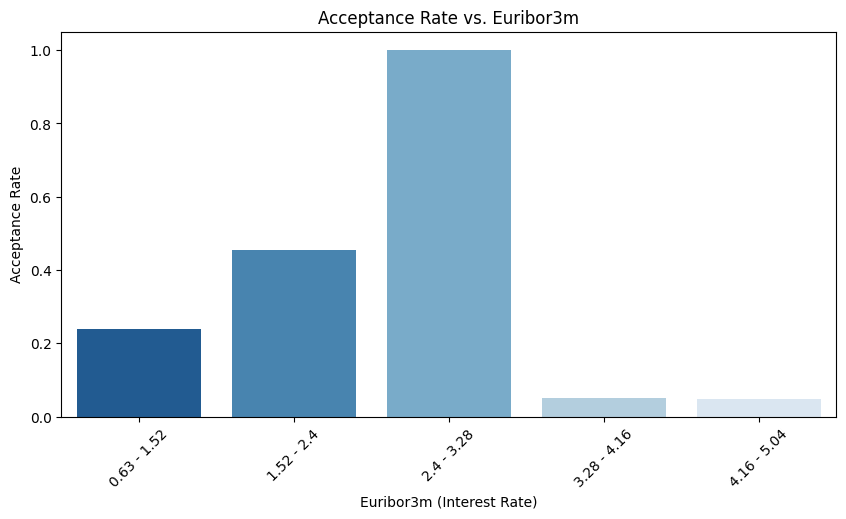

<ipython-input-26-d42f8b48c638>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nr_employed_acceptance['nr_employed_bin'].astype(str), y=nr_employed_acceptance['mean'], palette="Greens_r")


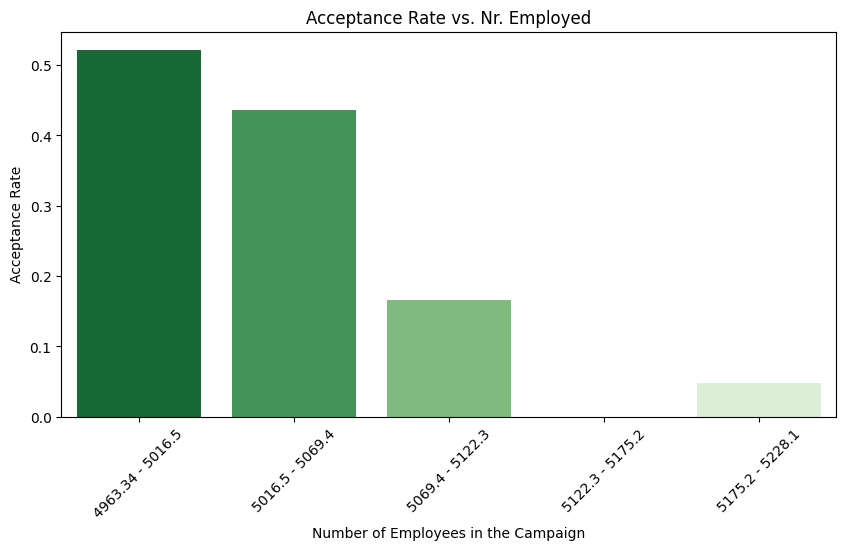

<ipython-input-26-d42f8b48c638>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cons_conf_acceptance['cons_conf_idx_bin'].astype(str), y=cons_conf_acceptance['mean'], palette="Purples_r")


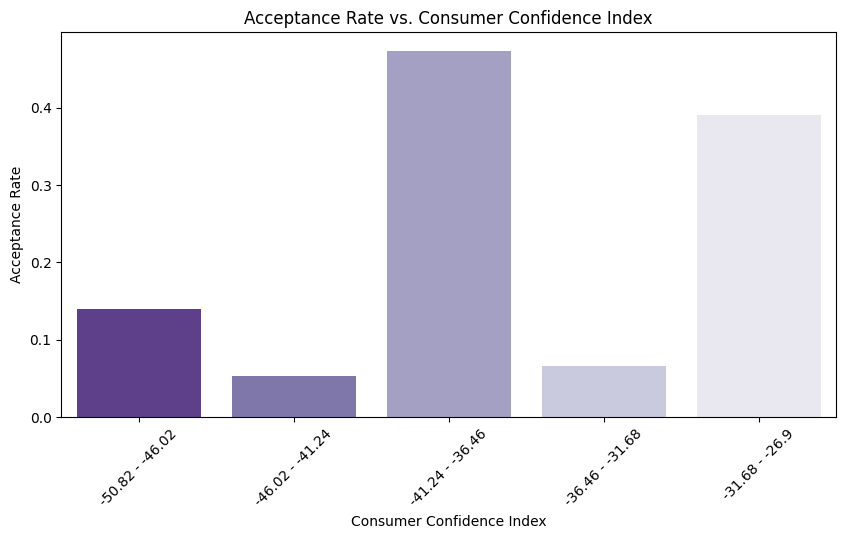

Euribor3m Bin        Count      Acceptance Rate
---------------------------------------------
0.63 - 1.52          13227      0.240266       
1.52 - 2.4           271        0.453875       
2.4 - 3.28           1          1.000000       
3.28 - 4.16          2957       0.050389       
4.16 - 5.04          24732      0.048075       

Nr. Employed Bin     Count      Acceptance Rate
---------------------------------------------
4963.34 - 5016.5     2058       0.521380       
5016.5 - 5069.4      1243       0.436042       
5069.4 - 5122.3      10197      0.165343       
5122.3 - 5175.2      0          nan            
5175.2 - 5228.1      27690      0.048357       

Consumer Confidence Bin   Count      Acceptance Rate
-------------------------------------------------------
-50.82 - -46.02           8866       0.140199       
-46.02 - -41.24           14685      0.053524       
-41.24 - -36.46           2070       0.473913       
-36.46 - -31.68           13726      0.066443       
-31.68 - 

In [26]:
# Copy the dataset to avoid modifying the original data
df_analysis = df.copy()

#  Bin Continuous Features
# Define bins for each feature (to group similar values)
df_analysis['euribor3m_bin'] = pd.cut(df_analysis['euribor3m'], bins=5)
df_analysis['nr_employed_bin'] = pd.cut(df_analysis['nr.employed'], bins=5)
df_analysis['cons_conf_idx_bin'] = pd.cut(df_analysis['cons.conf.idx'], bins=5)

# Compute Acceptance Rate and Count
# Compute the acceptance rate and count for each bin
euribor_acceptance = df_analysis.groupby('euribor3m_bin')['y'].agg(['mean', 'count']).reset_index()
nr_employed_acceptance = df_analysis.groupby('nr_employed_bin')['y'].agg(['mean', 'count']).reset_index()
cons_conf_acceptance = df_analysis.groupby('cons_conf_idx_bin')['y'].agg(['mean', 'count']).reset_index()

# Format Bin Labels for Better Readability
def format_bin_labels(bin_column):
    return [f"{round(interval.left, 2)} - {round(interval.right, 2)}" for interval in bin_column]

# Format bin labels for better readability
euribor_acceptance['euribor3m_bin'] = format_bin_labels(euribor_acceptance['euribor3m_bin'])
nr_employed_acceptance['nr_employed_bin'] = format_bin_labels(nr_employed_acceptance['nr_employed_bin'])
cons_conf_acceptance['cons_conf_idx_bin'] = format_bin_labels(cons_conf_acceptance['cons_conf_idx_bin'])



# Plot Acceptance Rate vs. Euribor3m
plt.figure(figsize=(10, 5))
sns.barplot(x=euribor_acceptance['euribor3m_bin'].astype(str), y=euribor_acceptance['mean'], palette="Blues_r")
plt.xticks(rotation=45)
plt.title("Acceptance Rate vs. Euribor3m")
plt.xlabel("Euribor3m (Interest Rate)")
plt.ylabel("Acceptance Rate")
plt.show()

# Plot Acceptance Rate vs. Nr.employed
plt.figure(figsize=(10, 5))
sns.barplot(x=nr_employed_acceptance['nr_employed_bin'].astype(str), y=nr_employed_acceptance['mean'], palette="Greens_r")
plt.xticks(rotation=45)
plt.title("Acceptance Rate vs. Nr. Employed")
plt.xlabel("Number of Employees in the Campaign")
plt.ylabel("Acceptance Rate")
plt.show()

#  Plot Acceptance Rate vs. Consumer Confidence Index
plt.figure(figsize=(10, 5))
sns.barplot(x=cons_conf_acceptance['cons_conf_idx_bin'].astype(str), y=cons_conf_acceptance['mean'], palette="Purples_r")
plt.xticks(rotation=45)
plt.title("Acceptance Rate vs. Consumer Confidence Index")
plt.xlabel("Consumer Confidence Index")
plt.ylabel("Acceptance Rate")
plt.show()

# Print Acceptance Rate and Count for Euribor3m
print(f"{'Euribor3m Bin':<20} {'Count':<10} {'Acceptance Rate':<15}")
print("-" * 45)
for i in range(len(euribor_acceptance)):
    print(f"{euribor_acceptance['euribor3m_bin'][i]:<20} {euribor_acceptance['count'][i]:<10} {euribor_acceptance['mean'][i]:<15.6f}")

# Print Acceptance Rate and Count for Nr.employed
print(f"\n{'Nr. Employed Bin':<20} {'Count':<10} {'Acceptance Rate':<15}")
print("-" * 45)
for i in range(len(nr_employed_acceptance)):
    print(f"{nr_employed_acceptance['nr_employed_bin'][i]:<20} {nr_employed_acceptance['count'][i]:<10} {nr_employed_acceptance['mean'][i]:<15.6f}")

#  Print Acceptance Rate and Count for Consumer Confidence Index
print(f"\n{'Consumer Confidence Bin':<25} {'Count':<10} {'Acceptance Rate':<15}")
print("-" * 55)
for i in range(len(cons_conf_acceptance)):
    print(f"{cons_conf_acceptance['cons_conf_idx_bin'][i]:<25} {cons_conf_acceptance['count'][i]:<10} {cons_conf_acceptance['mean'][i]:<15.6f}")


<ipython-input-27-0eacd5a672f9>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  nr_employed_count = df.groupby('nr_employed_bin')['y'].agg(['sum', 'count']).reset_index()


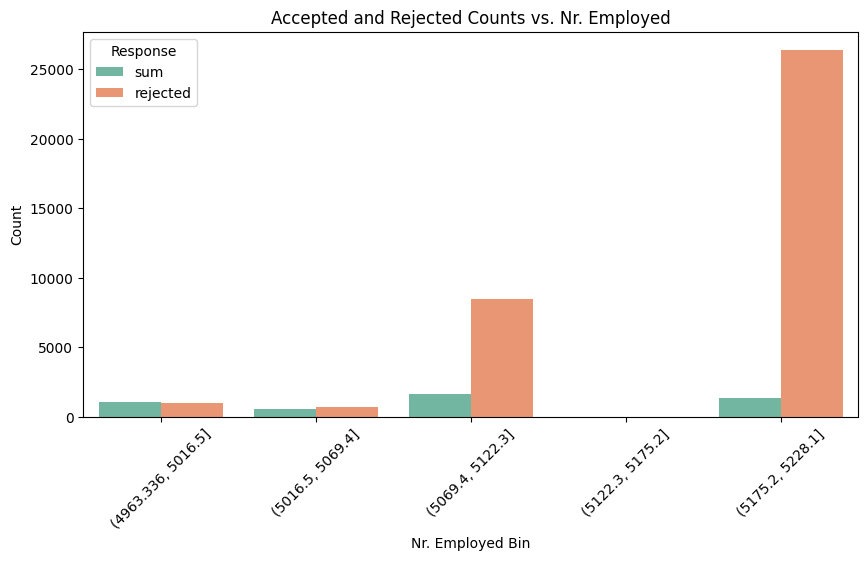

Nr. Employed Bin               Accepted   Rejected   Total     
--------------------------------------------------
4963.336 - 5016.5              1073       985        2058      
5016.5 - 5069.4                542        701        1243      
5069.4 - 5122.3                1686       8511       10197     
5122.3 - 5175.2                0          0          0         
5175.2 - 5228.1                1339       26351      27690     


In [27]:
# Create Bins for 'nr.employed'
# Here we create bins based on the 'nr.employed' column
nr_employed_bins = pd.cut(df['nr.employed'], bins=5)  # You can adjust the number of bins
df['nr_employed_bin'] = nr_employed_bins

# Compute the count of accepted and rejected for each 'nr.employed' bin
nr_employed_count = df.groupby('nr_employed_bin')['y'].agg(['sum', 'count']).reset_index()
nr_employed_count['rejected'] = nr_employed_count['count'] - nr_employed_count['sum']  # Rejected = Total - Accepted

# Melt the data for visualization (Accepted vs Rejected counts for nr.employed)
nr_employed_count_melted = nr_employed_count.melt(id_vars=['nr_employed_bin'], value_vars=['sum', 'rejected'],
                                                   var_name='Response', value_name='Count')

# Plot Accepted vs Rejected Counts for Nr. Employed
plt.figure(figsize=(10, 5))
sns.barplot(x='nr_employed_bin', y='Count', hue='Response', data=nr_employed_count_melted, palette='Set2')
plt.title("Accepted and Rejected Counts vs. Nr. Employed")
plt.xlabel("Nr. Employed Bin")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Print the Nr. Employed Data (Accepted, Rejected, and Total Counts)
print(f"{'Nr. Employed Bin':<30} {'Accepted':<10} {'Rejected':<10} {'Total':<10}")
print("-" * 50)
for i in range(len(nr_employed_count)):
    accepted = nr_employed_count['sum'][i]
    rejected = nr_employed_count['rejected'][i]
    total = nr_employed_count['count'][i]
    # Convert Interval object to a readable format (e.g., "5000.0 - 6000.0")
    bin_label = f"{nr_employed_count['nr_employed_bin'][i].left} - {nr_employed_count['nr_employed_bin'][i].right}"
    print(f"{bin_label:<30} {accepted:<10} {rejected:<10} {total:<10}")

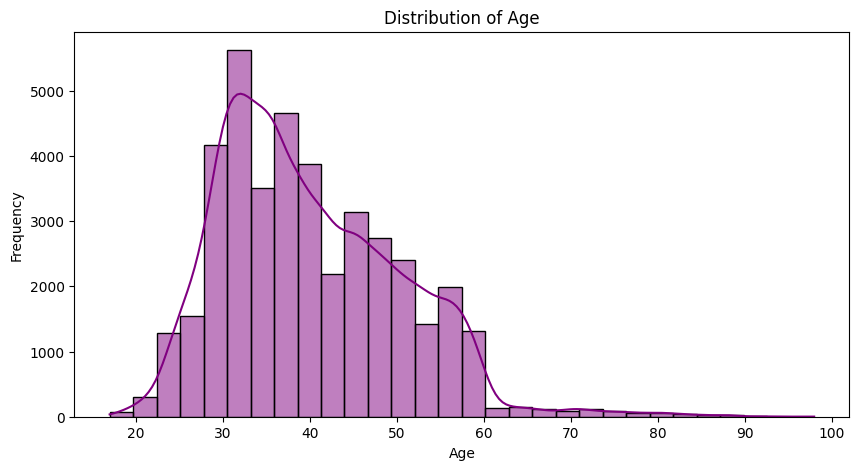

  age_bin  count
0   18-25   1063
1   26-35  13686
2   36-45  13500
3   46-55   8704
4   56-65   3567
5     66+    663


<ipython-input-28-07003e2f722e>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_bin_counts = df.groupby('age_bin').size().reset_index(name='count')
<ipython-input-28-07003e2f722e>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_acceptance = df.groupby('age_bin')['y'].mean().reset_index()
<ipython-input-28-07003e2f722e>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_acceptance['age_bin'], y=age_acceptance['y'], palette="Blues_r")


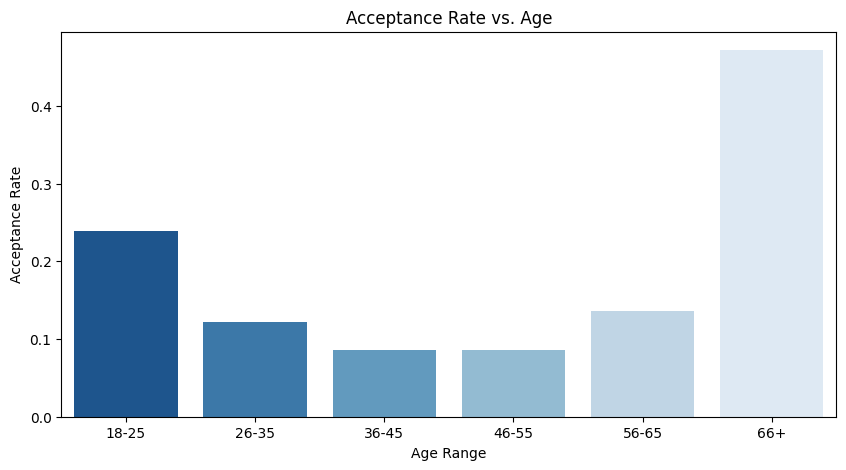

y            0     1
age_bin             
18-25      809   254
26-35    12020  1666
36-45    12332  1168
46-55     7951   753
56-65     3083   484
66+        350   313


<ipython-input-28-07003e2f722e>:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_acceptance_details = df.groupby('age_bin')['y'].value_counts().unstack(fill_value=0)


In [28]:
# **1Re-Define Bins for Age with New Spread
df['age_bin'] = pd.cut(df['age'], bins=[18, 25, 35, 45, 55, 65, 100],
                       labels=["18-25", "26-35", "36-45", "46-55", "56-65", "66+"],
                       right=False)

# Plot the distribution of age to check for any issues
plt.figure(figsize=(10, 5))
sns.histplot(df['age'], kde=True, color='purple', bins=30)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Check the number of samples in each age bin
age_bin_counts = df.groupby('age_bin').size().reset_index(name='count')
print(age_bin_counts)

# Recompute acceptance rate with the updated bins
age_acceptance = df.groupby('age_bin')['y'].mean().reset_index()

# Plot the acceptance rate for Age after adjustment
plt.figure(figsize=(10, 5))
sns.barplot(x=age_acceptance['age_bin'], y=age_acceptance['y'], palette="Blues_r")
plt.title("Acceptance Rate vs. Age")
plt.xlabel("Age Range")
plt.ylabel("Acceptance Rate")
plt.show()

#  Check the count of 'Yes' and 'No' responses in each age group
age_acceptance_details = df.groupby('age_bin')['y'].value_counts().unstack(fill_value=0)
print(age_acceptance_details)


  age_bin  count
0   18-25   1063
1   26-35  13686
2   36-45  13500
3   46-55   8704
4   56-65   3567
5     66+    663


<ipython-input-29-772038fed77c>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_bin_counts = df.groupby('age_bin').size().reset_index(name='count')
<ipython-input-29-772038fed77c>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_acceptance_counts = df.groupby('age_bin')['y'].agg(['sum', 'count']).reset_index()


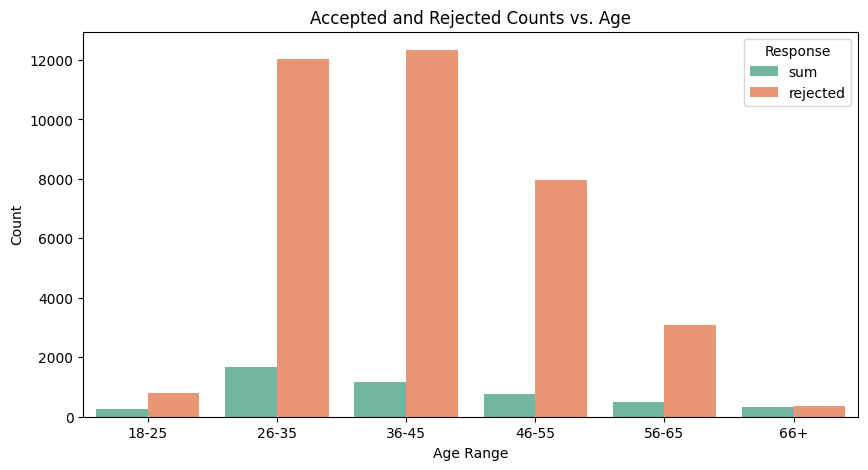

Age Range  Accepted   Rejected   Total     
----------------------------------------
18-25      254        809        1063      
26-35      1666       12020      13686     
36-45      1168       12332      13500     
46-55      753        7951       8704      
56-65      484        3083       3567      
66+        313        350        663       


In [29]:
# Re-Define Bins for Age with New Spread
df['age_bin'] = pd.cut(df['age'], bins=[18, 25, 35, 45, 55, 65, 100],
                       labels=["18-25", "26-35", "36-45", "46-55", "56-65", "66+"],
                       right=False)

# Check the number of samples in each age bin
age_bin_counts = df.groupby('age_bin').size().reset_index(name='count')
print(age_bin_counts)

# Compute Accepted and Rejected Counts
# Group by age_bin and calculate the number of "Yes" (accepted) and "No" (rejected) responses
age_acceptance_counts = df.groupby('age_bin')['y'].agg(['sum', 'count']).reset_index()
age_acceptance_counts['rejected'] = age_acceptance_counts['count'] - age_acceptance_counts['sum']  # Rejected = Total - Accepted

# Plot Accepted and Rejected Counts for Age Bins
# Create a new DataFrame for plotting side-by-side bars
age_acceptance_counts_melted = age_acceptance_counts.melt(id_vars=['age_bin'], value_vars=['sum', 'rejected'],
                                                          var_name='Response', value_name='Count')

plt.figure(figsize=(10, 5))
sns.barplot(x='age_bin', y='Count', hue='Response', data=age_acceptance_counts_melted, palette='Set2')
plt.title("Accepted and Rejected Counts vs. Age")
plt.xlabel("Age Range")
plt.ylabel("Count")
plt.show()

# Print Count of Accepted and Rejected Responses for Each Age Group
print(f"{'Age Range':<10} {'Accepted':<10} {'Rejected':<10} {'Total':<10}")
print("-" * 40)
for i in range(len(age_acceptance_counts)):
    accepted = age_acceptance_counts['sum'][i]
    rejected = age_acceptance_counts['rejected'][i]
    total = age_acceptance_counts['count'][i]
    print(f"{age_acceptance_counts['age_bin'][i]:<10} {accepted:<10} {rejected:<10} {total:<10}")

<ipython-input-30-35bbf4349dbd>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='education_group', palette='Set2')


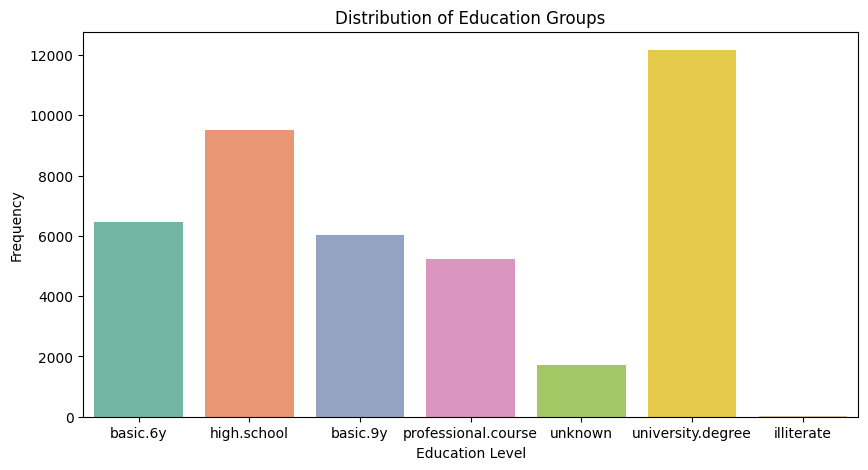

<ipython-input-30-35bbf4349dbd>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=education_acceptance['education_group'], y=education_acceptance['y_acceptance'], palette="Blues_r")


       education_group  count
0             basic.6y   6468
1             basic.9y   6045
2          high.school   9515
3           illiterate     18
4  professional.course   5243
5    university.degree  12168
6              unknown   1731


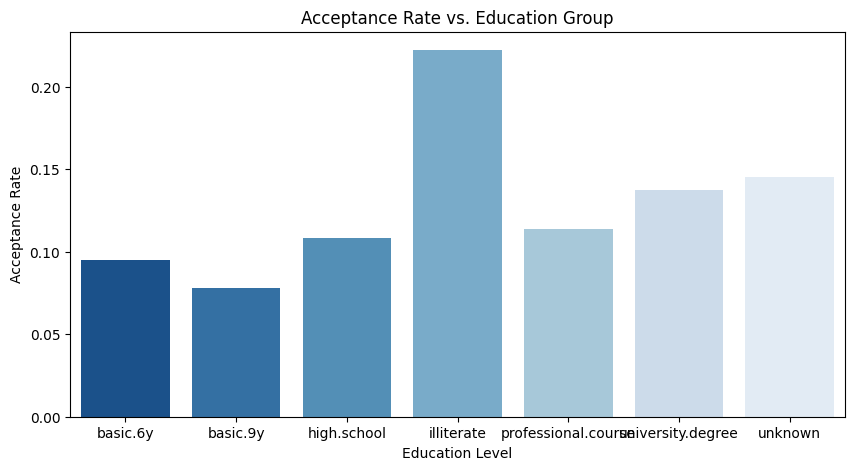

y                        0     1
education_group                 
basic.6y              5852   616
basic.9y              5572   473
high.school           8484  1031
illiterate              14     4
professional.course   4648   595
university.degree    10498  1670
unknown               1480   251
       education_group  y_acceptance  count  weighted_rate
0             basic.6y      0.095238   6468       0.014956
1             basic.9y      0.078246   6045       0.011484
2          high.school      0.108355   9515       0.025032
3           illiterate      0.222222     18       0.000097
4  professional.course      0.113485   5243       0.014446
5    university.degree      0.137245  12168       0.040546
6              unknown      0.145003   1731       0.006094


In [30]:
# Create the 'education_group' column based on one-hot encoding
education_columns = ['education_basic.6y', 'education_basic.9y', 'education_high.school',
                     'education_illiterate', 'education_professional.course',
                     'education_university.degree', 'education_unknown']

# Create the 'education_group' column based on the one-hot encoding
df['education_group'] = df[education_columns].idxmax(axis=1).str.replace('education_', '')

# Plot the distribution of education groups
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='education_group', palette='Set2')
plt.title("Distribution of Education Groups")
plt.xlabel("Education Level")
plt.ylabel("Frequency")
plt.show()

# Check the number of samples in each education category
education_counts = df.groupby('education_group').size().reset_index(name='count')
print(education_counts)

# Compute the acceptance rate for each education group
education_acceptance = df.groupby('education_group').agg(
    y_acceptance=('y', 'mean'),
    count=('y', 'size')
).reset_index()

# Calculate the weighted acceptance rate for each education group
education_acceptance['weighted_rate'] = education_acceptance['y_acceptance'] * education_acceptance['count'] / education_acceptance['count'].sum()

# Plot the acceptance rate for Education
plt.figure(figsize=(10, 5))
sns.barplot(x=education_acceptance['education_group'], y=education_acceptance['y_acceptance'], palette="Blues_r")
plt.title("Acceptance Rate vs. Education Group")
plt.xlabel("Education Level")
plt.ylabel("Acceptance Rate")
plt.show()

# Check the count of 'Yes' and 'No' responses in each education group
education_acceptance_details = df.groupby('education_group')['y'].value_counts().unstack(fill_value=0)
print(education_acceptance_details)

print(education_acceptance)



<ipython-input-31-2f82c069a05a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='marital_group', palette='Set2')


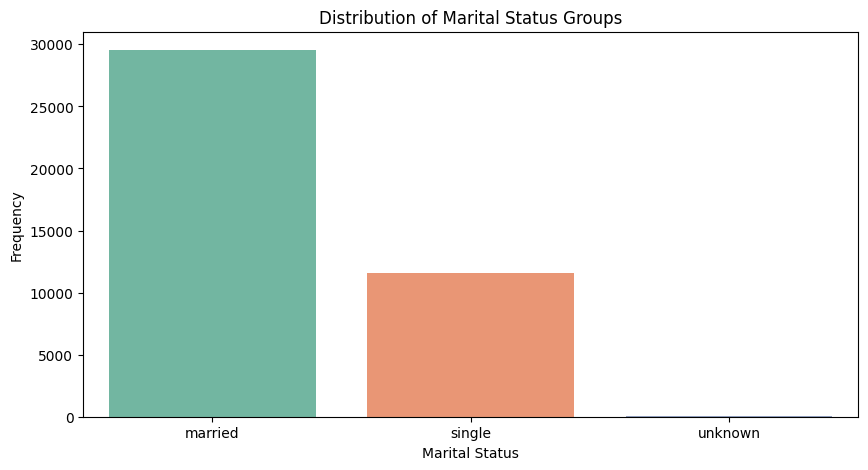

  marital_group  count
0       married  29540
1        single  11568
2       unknown     80


<ipython-input-31-2f82c069a05a>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=marital_acceptance['marital_group'], y=marital_acceptance['y_acceptance'], palette="Purples_r")


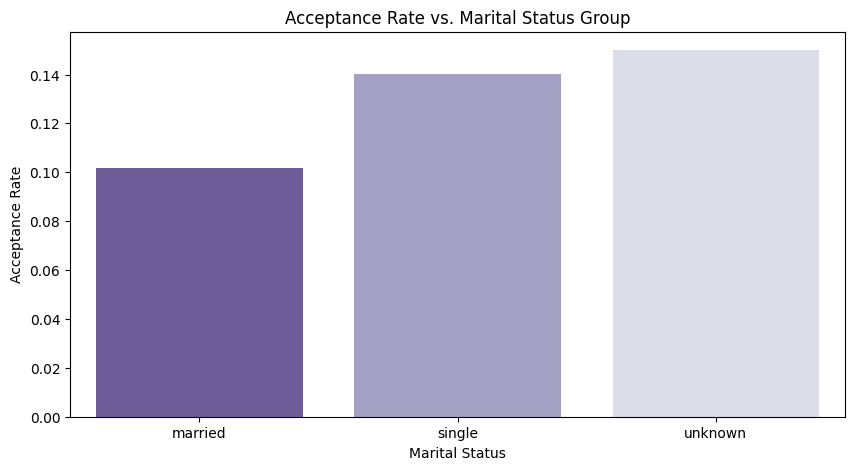

y                  0     1
marital_group             
married        26532  3008
single          9948  1620
unknown           68    12
  marital_group  y_acceptance  count  weighted_rate
0       married      0.101828  29540       0.073031
1        single      0.140041  11568       0.039332
2       unknown      0.150000     80       0.000291


In [31]:
# Plot Acceptance Rate vs. Marital Status
# We will group by the original marital categories
marital_columns = ['marital_married', 'marital_single', 'marital_unknown']

# Create a new 'marital_group' column based on the one-hot encoding
df['marital_group'] = df[marital_columns].idxmax(axis=1).str.replace('marital_', '')

# Plot the distribution of marital groups
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='marital_group', palette='Set2')
plt.title("Distribution of Marital Status Groups")
plt.xlabel("Marital Status")
plt.ylabel("Frequency")
plt.show()

# Check the number of samples in each marital category
marital_counts = df.groupby('marital_group').size().reset_index(name='count')
print(marital_counts)

# Compute the acceptance rate for each marital group
marital_acceptance = df.groupby('marital_group').agg(
    y_acceptance=('y', 'mean'),
    count=('y', 'size')
).reset_index()

# Calculate the weighted acceptance rate for each marital group
marital_acceptance['weighted_rate'] = marital_acceptance['y_acceptance'] * marital_acceptance['count'] / marital_acceptance['count'].sum()

# Plot the acceptance rate for Marital Status
plt.figure(figsize=(10, 5))
sns.barplot(x=marital_acceptance['marital_group'], y=marital_acceptance['y_acceptance'], palette="Purples_r")
plt.title("Acceptance Rate vs. Marital Status Group")
plt.xlabel("Marital Status")
plt.ylabel("Acceptance Rate")
plt.show()

# Check the count of 'Yes' and 'No' responses in each marital group
marital_acceptance_details = df.groupby('marital_group')['y'].value_counts().unstack(fill_value=0)
print(marital_acceptance_details)



print(marital_acceptance)



In [32]:
# Calculate overall acceptance rate
# Proportion of "yes" responses in the test set
acceptance_rate = y_test.mean()


print(f"Overall Acceptance Rate: {acceptance_rate:.4%}")  # Display as a percentage


Overall Acceptance Rate: 49.8495%


In [33]:
# Make predictions with the best model
y_pred = best_model.predict(X_test_scaled)


if best_model_name == "Neural Network":
    y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary labels  if needed

# Get probabilities for the positive class (class 1)
y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]  # This extracts the probabilities for class 1


# Find correct classifications
correct_indices = np.where(y_pred == y_test.to_numpy())[0]  # Find matching indices


print(f"✅ Total Correct Classifications: {len(correct_indices)}\n")


for i in correct_indices[:5]:
    print(f"Index: {i} | Actual: {y_test.iloc[i]} | Predicted: {y_pred[i]}")


✅ Total Correct Classifications: 13957

Index: 0 | Actual: 1 | Predicted: 1
Index: 1 | Actual: 0 | Predicted: 0
Index: 2 | Actual: 1 | Predicted: 1
Index: 3 | Actual: 1 | Predicted: 1
Index: 4 | Actual: 1 | Predicted: 1


In [34]:
# Make predictions with the best model
y_pred = best_model.predict(X_test_scaled)


if best_model_name == "Neural Network":
    y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary labels if needed


# Find incorrect classifications
incorrect_indices = np.where(y_pred != y_test.to_numpy())[0]  # Get indices where prediction is incorrect


print(f"❌ Total Incorrect Classifications: {len(incorrect_indices)}\n")


for i in incorrect_indices[:5]:
    print(f"Index: {i} | Actual: {y_test.iloc[i]} | Predicted: {y_pred[i]}")


❌ Total Incorrect Classifications: 663

Index: 17 | Actual: 0 | Predicted: 1
Index: 20 | Actual: 0 | Predicted: 1
Index: 31 | Actual: 0 | Predicted: 1
Index: 37 | Actual: 0 | Predicted: 1
Index: 39 | Actual: 0 | Predicted: 1


In [35]:
# Create a copy of X_test and set 'duration' to 0 (or remove it)
X_test_no_duration = X_test.copy()
if 'duration' in X_test_no_duration.columns:
    X_test_no_duration['duration'] = 0  # Neutralize duration


# Extract one-hot encoding categories
education_columns = [col for col in X_test.columns if col.startswith('education_')]
marital_columns = [col for col in X_test.columns if col.startswith('marital_')]
poutcome_columns = [col for col in X_test.columns if col.startswith('poutcome_')]

# For education, display all categories
def extract_all_education_categories(profile, education_columns):
    education_values = []
    for col in education_columns:
        category = col.replace("education_", "")
        if profile[col] == 1:
            education_values.append(category)
    return education_values if education_values else ["Unknown"]



y_pred_proba_no_duration = best_model.predict_proba(X_test_no_duration)[:, 1]  # Get probabilities for class 1 (subscribed)


# Select top 5 clients with the highest predicted probability to subscribe
top_responders_no_duration = np.argsort(y_pred_proba_no_duration)[::-1][:5]



# Convert positional indices to actual DataFrame indices
top_indices = X_test.iloc[top_responders_no_duration].index

for i, index in enumerate(top_indices, 1):  # Use actual indices
    profile = X_test.loc[index]  # Get profile using .loc instead of .iloc
    actual_value = y_test.loc[index]  # Match index in y_test
    probability = y_pred_proba_no_duration[top_responders_no_duration[i - 1]]  # Use original probability index

    # Convert actual value (y) to "Yes" or "No"
    actual_value_str = 'Yes' if actual_value == 1 else 'No'

    # Extract all education categories
    education_categories = extract_all_education_categories(profile, education_columns)

    # Extract other categories (marital, poutcome)
    marital_category = next((col.replace("marital_", "") for col in marital_columns if profile[col] == 1), "Unknown")
    poutcome_category = next((col.replace("poutcome_", "") for col in poutcome_columns if profile[col] == 1), "Unknown")

    # Print structured output
    print(f"--- Profile {i} ---")
    print(f"Index: {index}")
    print(f"Output Variable (y) - Has the client subscribed a term deposit? : {actual_value_str}")
    print(f"Predicted Probability of Responding: {probability:.4f}\n")

    print("Profile (Features):")
    print(f"  age: {profile['age']}")
    print(f"  education: {', '.join(education_categories)}")  # Display all education categories
    print(f"  marital: {marital_category}")
    print(f"  euribor3m: {profile['euribor3m']}")
    print(f"  nr.employed: {profile['nr.employed']}")
    print(f"  cons.conf.idx: {profile['cons.conf.idx']}")
    print(f"  campaign: {profile['campaign']}")
    print(f"  pdays: {profile['pdays']}")
    print(f"  poutcome: {poutcome_category}")
    print(f"  duration: {profile['duration']}")

    print("-" * 40)


--- Profile 1 ---
Index: 68370
Output Variable (y) - Has the client subscribed a term deposit? : Yes
Predicted Probability of Responding: 0.8900

Profile (Features):
  age: 35
  education: high.school, university.degree
  marital: single
  euribor3m: 0.6625449538438397
  nr.employed: 5008.7
  cons.conf.idx: -36.107791999598874
  campaign: 1
  pdays: 999
  poutcome: nonexistent
  duration: 556
----------------------------------------
--- Profile 2 ---
Index: 56923
Output Variable (y) - Has the client subscribed a term deposit? : Yes
Predicted Probability of Responding: 0.8700

Profile (Features):
  age: 34
  education: high.school, university.degree
  marital: married
  euribor3m: 0.75239401819297
  nr.employed: 5017.5
  cons.conf.idx: -29.804661398515616
  campaign: 1
  pdays: 999
  poutcome: nonexistent
  duration: 234
----------------------------------------
--- Profile 3 ---
Index: 42717
Output Variable (y) - Has the client subscribed a term deposit? : Yes
Predicted Probability of R

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [39]:


# Create a copy of X_test and set 'duration' to 0 instead of removing it
X_test_no_duration = X_test.copy()
if 'duration' in X_test_no_duration.columns:
    X_test_no_duration['duration'] = 0  # Neutralize duration

# Function to extract all education categories
def extract_all_education_categories(profile, education_columns):
    education_values = []
    for col in education_columns:
        category = col.replace("education_", "")
        if profile[col] == 1:
            education_values.append(category)
    return education_values if education_values else ["Unknown"]

# Predict probabilities using the adjusted dataset
y_pred_proba_no_duration = best_model.predict_proba(X_test_no_duration)[:, 1]

# Identify indices where the predicted probability is high but the actual response is NO
false_positive_indices = np.where((y_pred_proba_no_duration > 0.5) & (y_test == 0))[0]

# Sort by highest predicted probability
top_false_positives = false_positive_indices[np.argsort(y_pred_proba_no_duration[false_positive_indices])[::-1]][:5]

print(f"Top 5 Clients Predicted to Subscribe but Did NOT:\n")



# Define numerical columns (including duration)
numerical_columns = ["duration", "euribor3m", "nr.employed", "cons.conf.idx", "campaign", "pdays"]

# Convert positional indices to actual DataFrame indices
top_indices = X_test.iloc[top_false_positives].index



for i, index in enumerate(top_indices, 1):  # Use actual indices
    profile = X_test.loc[index]  # Get profile using .loc instead of .iloc
    actual_value = y_test.loc[index]  # Match index in y_test
    probability = y_pred_proba_no_duration[top_false_positives[i - 1]]  # Use original probability index

    # Convert actual value (y) to "Yes" or "No"
    actual_value_str = 'Yes' if actual_value == 1 else 'No'

    # Extract all education categories (instead of just the first match)
    education_categories = extract_all_education_categories(profile, education_columns)

    # Extract other categories (marital, poutcome)
    marital_category = next((col.replace("marital_", "") for col in marital_columns if profile[col] == 1), "Unknown")
    poutcome_category = next((col.replace("poutcome_", "") for col in poutcome_columns if profile[col] == 1), "Unknown")

    # Print structured output
    print(f"--- Profile {i} ---")
    print(f"Index: {index}")
    print(f"Output Variable (y) - Has the client subscribed a term deposit? : {actual_value_str} (FALSE NEGATIVE)")
    print(f"Predicted Probability of Responding: {probability:.4f}\n")

    print("Profile (Features):")
    print(f"  age: {profile['age']}")
    print(f"  education: {', '.join(education_categories)}")  # Display all education categories
    print(f"  marital: {marital_category}")
    print(f"  duration: {profile['duration']}")
    print(f"  euribor3m: {profile['euribor3m']}")
    print(f"  nr.employed: {profile['nr.employed']}")
    print(f"  cons.conf.idx: {profile['cons.conf.idx']}")
    print(f"  campaign: {profile['campaign']}")
    print(f"  pdays: {profile['pdays']}")
    print(f"  poutcome: {poutcome_category}")

    print("-" * 40)


Top 5 Clients Predicted to Subscribe but Did NOT:

--- Profile 1 ---
Index: 31789
Output Variable (y) - Has the client subscribed a term deposit? : No (FALSE NEGATIVE)
Predicted Probability of Responding: 0.7800

Profile (Features):
  age: 31
  education: high.school
  marital: single
  duration: 361
  euribor3m: 1.327
  nr.employed: 5099.1
  cons.conf.idx: -46.2
  campaign: 1
  pdays: 999
  poutcome: nonexistent
----------------------------------------
--- Profile 2 ---
Index: 34239
Output Variable (y) - Has the client subscribed a term deposit? : No (FALSE NEGATIVE)
Predicted Probability of Responding: 0.7700

Profile (Features):
  age: 23
  education: Unknown
  marital: single
  duration: 9
  euribor3m: 1.266
  nr.employed: 5099.1
  cons.conf.idx: -46.2
  campaign: 6
  pdays: 999
  poutcome: nonexistent
----------------------------------------
--- Profile 3 ---
Index: 31978
Output Variable (y) - Has the client subscribed a term deposit? : No (FALSE NEGATIVE)
Predicted Probability of

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
